In [42]:
!pip install lxml


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [52]:
import os
import random
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

## implement a quick K-means

In [56]:
class K_means:
    mu_k = None
    k = 3
    max_it = 200
    col_names = None
    def __init__(self, k, max_it=200):
        self.k = k
        self.max_it = max_it
    
    def fit(self, X):
        """
        Aprender los centroides de los datos
        """
        self.col_names = [f"c{i}" for i in range(X.shape[1])]
        df = pd.DataFrame(X, columns=self.col_names)
        df["label"] = [random.randint(0,self.k-1) for i in range(X.shape[0])]
        eq_labels = False
        it = 0
        while not eq_labels and it < self.max_it:
            it += 1
            self.mu_k = df.groupby("label").agg("mean").values
            new_label = self.predict(df[self.col_names])
            eq_labels = all(df["label"] == new_label)
            df["label"] = new_label
            print(f"it {it}, y eq labels are {eq_labels}")
            
    def predict(self, X):
        """
        Devuelve las etiquetas de los datos utilizando la distancia a los centroides.
        """
        new_label = []
        for i_x in range(X.shape[0]):
            add_dist = []
            for k_i in range(self.k):
                add_dist.append(np.linalg.norm(np.array(X.values[i_x,:]) - 
                                               np.array(self.mu_k[k_i,:])))
            new_label.append(np.argmin(add_dist))
        return new_label

In [58]:
X = [[random.random(), random.random(), random.random()] for i in range(200)] 
X = np.array(X)
kmeans = K_means(5)
kmeans.fit(X)
kmeans.mu_k

it 1, y eq labels are False
it 2, y eq labels are False
it 3, y eq labels are False
it 4, y eq labels are False
it 5, y eq labels are False
it 6, y eq labels are False
it 7, y eq labels are False
it 8, y eq labels are False
it 9, y eq labels are False
it 10, y eq labels are False
it 11, y eq labels are True


array([[0.22173966, 0.62267457, 0.24399995],
       [0.56047744, 0.77731294, 0.85982951],
       [0.81396306, 0.62189422, 0.26694921],
       [0.214492  , 0.30749636, 0.75210504],
       [0.65095536, 0.2442005 , 0.54901559]])

## Model regresion logistica
Model using regresion

In [5]:
df = pd.read_csv("data/pruebas_saber/Resultados_Saber_TyT_Gen_ricas_2020-1.csv")
df.describe(include="all")

/Users/joseramirez/repository/UCO_ML_AI/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (9,10,11,12,13,14,15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_EXTERIOR,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DISC_FISICA,ESTU_DISC_SISTEM,ESTU_DISC_AUDITCASTELL,ESTU_DISC_AUDITLSC,ESTU_DISC_VISUALCEGUE,ESTU_DISC_VISUALBAJA,ESTU_DISC_VOZHABLA,ESTU_DISC_INTELEC,ESTU_DISC_ESPAUTISTA,ESTU_DISC_PSICOSOCIAL,ESTU_DISC_ASPERGER,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_AREARESIDE,ESTU_ESTADOCIVIL,ESTU_COLE_TERMINO,ESTU_CODDANE_COLE_TERMINO,ESTU_COD_COLE_MCPIO_TERMINO,ESTU_OTROCOLE_TERMINO,ESTU_TITULOOBTENIDOBACHILLER,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_COMOCAPACITOEXAMENSB11,ESTU_TIPODOCUMENTOSB11,ESTU_SEMESTRECURSA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_CUANTOSCOMPARTEBAÑO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,INST_COD_INSTITUCION,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,ESTU_SNIES_PRGMACADEMICO,GRUPOREFERENCIA,ESTU_PRGM_CODMUNICIPIO,ESTU_PRGM_MUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_NUCLEO_PREGRADO,ESTU_INST_CODMUNICIPIO,ESTU_INST_MUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_PRIVADO_LIBERTAD,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_RAZONA_CUANTITATIVO_PNBC,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_LECTURA_CRITICA_PNBC,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_COMPETEN_CIUDADA_PNBC,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_INGLES_PNBC,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC,ESTU_ESTADOINVESTIGACION
count,68725,68725,68597,68667,68725,68725.0,68725,68725,68725,27,3,8,8,1,10,1,3,1,2,2,68688,68688.000000,68688,68688.00000,58499,58190,37609,3.760900e+04,37609.000000,11543,58465,58461,58461,58463,58461,58475,57799,58465,65210,65100,56760,60492,64573,64460,64325,64056,64006,63846,63817,63840,63783,63863,63706,63606,68725.000000,68725,68725,68661.000000,68725,68725.00000,68725,68725,68725,68725,68725,68725.000000,68725,68725,68725,68725,68725,68725.000000,68725,68725,68725.000000,68725.000000,68567.000000,68566.000000,68725.000000,68567.000000,68566.000000,68725.000000,68567.000000,68566.000000,68705.000000,68705,68567.000000,68566.000000,67851.000000,58108.000000,67696.000000,67695.000000,68725.000000,68567.000000,68566.000000,68725
unique,6,17,2,10735,1,NaN,68725,1,17,1,1,1,1,1,1,1,1,1,1,1,34,NaN,913,NaN,2,4,7201,NaN,NaN,9655,3,2,2,2,2,3,5,12,12,12,13,13,7,2,2,2,2,2,2,2,2,6,7,5,NaN,184,982,NaN,20,NaN,136,32,2,3,50,NaN,51,25,5,6,1,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,CC,COLOMBIA,M,09/21/2000 12:00:00 AM,NO,NaN,EK202010058873,ESTUDIANTE,COLOMBIA,x,x,x,x,x,x,x,x,x,x,x,BOGOTÁ,NaN,BOGOTÁ D.C.,NaN,Cabecera Municipal,Soltero,INST EDUC CEFA,NaN,NaN,otro,Bachiller académico,No,No,No,No,Repasó por cuenta propia,TI,04,Primaria incompleta,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,"Trabaja en el hogar, no trabaja o estudia",Estrato 2,Si,Si,Si,Si,No,No,No,No,3 o 4,No pago semestre,Más de 30 horas,NaN,SERVICIO NACIONAL DE APRENDIZAJE-SENA,TECNOLOGÍA EN CONTABILIDAD Y FINANZAS,NaN,TECNOLÓGICO EN ADMINISTRACIÓN Y TURISMO,NaN,BOGOTÁ D.C.,BOGOTÁ,TECNOLOGÍA,PRESENCIAL,ADMINISTRACIÓN,NaN,BOGOTÁ D.C.,BOGOTÁ,INSTITUCIÓN TECNOLÓGICA,OFICIAL NACIONAL,N,NaN,BOGOTÁ D.C.,BOGOTÁ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PUBLICAR
freq,67218,68663,34798,45,68725,NaN,1,68725,68663,27,3,8,8,1,10,1,

### Crear features basicos
Utilizar la base para crear las trasnformaciones basicas

In [6]:
#transform data
# edad
now = pd.Timestamp('now')
df["ESTU_EDAD"] = (now  - pd.to_datetime(df["ESTU_FECHANACIMIENTO"], errors="coerce")).astype('<m8[Y]') 
# mun
ix_mun = dict([(i,v) for i,v in
        zip(df["ESTU_MCPIO_RESIDE"].value_counts().index, df["ESTU_MCPIO_RESIDE"].value_counts().values) if v > 30 ])
df["ESTU_MCPIO_RESIDE_GR30"] = df["ESTU_MCPIO_RESIDE"].apply(lambda x: x if ix_mun.get(x,0) > 30 else 'otro')
df["ESTU_SEMESTRECURSA_NUM"] = df["ESTU_SEMESTRECURSA"].apply(lambda x: 12 if x == "12 o más" else float(x))
df["ESTU_VIAJA"] = (df["ESTU_MCPIO_RESIDE"]==df["ESTU_INST_MUNICIPIO"]).astype(int)
# top 20 mun and cole
top_mun = set(df.groupby(["ESTU_MCPIO_RESIDE"],as_index=False).count()\
    [["ESTU_MCPIO_RESIDE","ESTU_CONSECUTIVO"]].sort_values("ESTU_CONSECUTIVO", ascending=False)\
    .head(20))
df["ESTU_MCPIO_CITY"] = df["ESTU_MCPIO_RESIDE"].apply(lambda x: 1 if x in top_mun else 0 )
top_cole = set(df.groupby(["ESTU_COLE_TERMINO"],as_index=False).count()\
    [["ESTU_COLE_TERMINO","ESTU_CONSECUTIVO"]].sort_values("ESTU_CONSECUTIVO", ascending=False)\
    .head(50)['ESTU_COLE_TERMINO'].values)
df["ESTU_COLE_TERMINO_TOP"] = df["ESTU_COLE_TERMINO"].apply(lambda x: 1 if x in top_cole else 0 )

### Ideas features
#### Fetaures about student
- Viaja: Si estudiante reside en un luagr diferente al de la universidad

#### Features about family
- Num baños es el grupo familiar

#### Features about institution
- GroupSize: tamaño del salon

#### Features about location

In [7]:
df

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_EXTERIOR,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DISC_FISICA,ESTU_DISC_SISTEM,ESTU_DISC_AUDITCASTELL,ESTU_DISC_AUDITLSC,ESTU_DISC_VISUALCEGUE,ESTU_DISC_VISUALBAJA,ESTU_DISC_VOZHABLA,ESTU_DISC_INTELEC,ESTU_DISC_ESPAUTISTA,ESTU_DISC_PSICOSOCIAL,ESTU_DISC_ASPERGER,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_AREARESIDE,ESTU_ESTADOCIVIL,ESTU_COLE_TERMINO,ESTU_CODDANE_COLE_TERMINO,ESTU_COD_COLE_MCPIO_TERMINO,ESTU_OTROCOLE_TERMINO,ESTU_TITULOOBTENIDOBACHILLER,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_COMOCAPACITOEXAMENSB11,ESTU_TIPODOCUMENTOSB11,ESTU_SEMESTRECURSA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_CUANTOSCOMPARTEBAÑO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,INST_COD_INSTITUCION,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,ESTU_SNIES_PRGMACADEMICO,GRUPOREFERENCIA,ESTU_PRGM_CODMUNICIPIO,ESTU_PRGM_MUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_NUCLEO_PREGRADO,ESTU_INST_CODMUNICIPIO,ESTU_INST_MUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_PRIVADO_LIBERTAD,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_RAZONA_CUANTITATIVO_PNBC,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_LECTURA_CRITICA_PNBC,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_COMPETEN_CIUDADA_PNBC,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_INGLES_PNBC,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC,ESTU_ESTADOINVESTIGACION,ESTU_EDAD,ESTU_MCPIO_RESIDE_GR30,ESTU_SEMESTRECURSA_NUM,ESTU_VIAJA,ESTU_MCPIO_CITY,ESTU_COLE_TERMINO_TOP
0,CC,COLOMBIA,M,09/16/1986 12:00:00 AM,NO,20201,EK202010002443,ESTUDIANTE,COLOMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CALDAS,17.0,MANIZALES,17001.0,Cabecera Municipal,Unión libre,NaN,NaN,NaN,colegio anglo frances,Bachiller académico,No,No,No,Si,Repasó por cuenta propia,CC,08,Educación profesional incompleta,Secundaria (Bachillerato) completa,No sabe,Es dueño de un negocio pequeño (tiene pocos em...,Estrato 3,Si,Si,Si,Si,Si,Si,No,No,2,Entre un millon y 3 millones de pesose,Más de 30 horas,2818,CORPORACION UNIVERSITARIA DE SANTA ROSA DE CAB...,TECNOLOGIA EN PRODUCCION ANIMAL,2026.0,TECNOLÓGICO EN CIENCIAS AGROPECUARIAS,66682,SANTA ROSA DE CABAL,RISARALDA,TECNOLOGÍA,PRESENCIAL,ZOOTECNIA,66682,SANTA ROSA DE CABAL,RISARALDA,INSTITUCIÓN UNIVERSITARIA,NO OFICIAL - CORPORACIÓN,N,11001,BOGOTÁ D.C.,BOGOTÁ,11,84,43.0,56.0,86,36.0,52.0,105,57.0,68.0,55.0,-A1,5.0,9.0,0.0,NaN,1.0,1.0,66,9.0,17.0,PUBLICAR,36.0,MANIZALES,8.0,0,0,0
1,CC,COLOMBIA,F,01/12/1996 12:00:00 AM,NO,20201,EK202010083686,ESTUDIANTE,COLOMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RISARALDA,66.0,SANTA ROSA DE CABAL,66682.0,Cabecera Municipal,Soltero,SE LORENCITA VILLEGAS - SEDE PRINCIPAL,1.666820e+11,66682.0,NaN,Bachiller académico,No,Si,No,No,No realizó ninguna prueba de preparación,TI,06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2818,CORPORACION UNIVERSITARIA DE SANTA ROSA DE CAB...,TECNOLOGIA EN DESARROLLO DE SISTEMAS INFORM¿TICOS,104837.0,TECNOLÓGICO EN TIC,66682,SANTA ROSA DE CABAL,RISARALDA,TECNOLOGÍA,PRESENCIAL,"INGENIERÍA DE SISTEMAS, TELEMÁTICA Y AFINES",66682,SANTA ROSA DE CABAL,RISARALDA,INSTITUCIÓN UNIVERSITARIA,NO OFICIAL - CORPORACIÓN,N,11001,BOGOTÁ D.C.,BOGOTÁ,11,107,77.0,68.0,139,98.0,96.0,98,47.0,41.0,108.0,A2,63.0,50.0,134.0,4.0,95.0,93.0,117,89.0,83.0,PUBLICAR,27.0,SANTA ROSA DE CABAL,6.0,1,0,0
2

In [8]:
df.groupby("ESTU_COLE_TERMINO",as_index=False).count()

,ESTU_COLE_TERMINO,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_EXTERIOR,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DISC_FISICA,ESTU_DISC_SISTEM,ESTU_DISC_AUDITCASTELL,ESTU_DISC_AUDITLSC,ESTU_DISC_VISUALCEGUE,ESTU_DISC_VISUALBAJA,ESTU_DISC_VOZHABLA,ESTU_DISC_INTELEC,ESTU_DISC_ESPAUTISTA,ESTU_DISC_PSICOSOCIAL,ESTU_DISC_ASPERGER,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_AREARESIDE,ESTU_ESTADOCIVIL,ESTU_CODDANE_COLE_TERMINO,ESTU_COD_COLE_MCPIO_TERMINO,ESTU_OTROCOLE_TERMINO,ESTU_TITULOOBTENIDOBACHILLER,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_COMOCAPACITOEXAMENSB11,ESTU_TIPODOCUMENTOSB11,ESTU_SEMESTRECURSA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_CUANTOSCOMPARTEBAÑO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,INST_COD_INSTITUCION,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,ESTU_SNIES_PRGMACADEMICO,GRUPOREFERENCIA,ESTU_PRGM_CODMUNICIPIO,ESTU_PRGM_MUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_NUCLEO_PREGRADO,ESTU_INST_CODMUNICIPIO,ESTU_INST_MUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_PRIVADO_LIBERTAD,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_RAZONA_CUANTITATIVO_PNBC,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_LECTURA_CRITICA_PNBC,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_COMPETEN_CIUDADA_PNBC,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_INGLES_PNBC,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC,ESTU_ESTADOINVESTIGACION,ESTU_EDAD,ESTU_MCPIO_RESIDE_GR30,ESTU_SEMESTRECURSA_NUM,ESTU_VIAJA,ESTU_MCPIO_CITY,ESTU_COLE_TERMINO_TOP
0,ABSALON TORRES CAMACHO,16,16,16,16,16,16,16,16,16,0,0,0,0,0,0,0,0,0,0,0,16,16,16,16,16,15,16,16,0,16,16,16,16,16,16,16,16,15,16,12,16,16,16,16,16,16,15,16,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,11,16,16,16,16,16,16,16,16,16,16,16,16
1,ACAD CENTRAL DE SISTEMAS ACSI,10,10,10,10,10,10,10,10,10,0,0,0,0,0,0,0,0,0,0,0,10,10,10,10,10,10,10,10,0,10,10,10,10,10,10,10,10,10,10,9,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,6,10,10,10,10,10,10,10,10,10,10,10,10
2,ACAD LA SALLE SAN BENILDO,4,4,4,4,4,4,4,4,4,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,0,4,4,4,4,4,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
3,ACAD MILIT MARISCAL SUCRE,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2
4,ACAD MILIT NAL HEROES GRANADINOS,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,VENTIUN ANGELES (INST EDUC DIST),11,11,11,11,11,11,11,11,11,0,0,0,0,0,0,0,0,0,0,0,11

In [9]:

df.groupby(["ESTU_MCPIO_RESIDE"],as_index=False).count()\
    [["ESTU_MCPIO_RESIDE","ESTU_CONSECUTIVO"]].sort_values("ESTU_CONSECUTIVO", ascending=False)\
    .head(20).values

array([['BOGOTÁ D.C.', 19894],
       ['MEDELLÍN', 4617],
       ['CARTAGENA DE INDIAS', 2843],
       ['CALI', 2227],
       ['SOACHA', 1777],
       ['IBAGUÉ', 1531],
       ['BARRANQUILLA', 1524],
       ['CÚCUTA', 1107],
       ['SOLEDAD', 1039],
       ['BUCARAMANGA', 1035],
       ['BELLO', 1001],
       ['VILLAVICENCIO', 905],
       ['PEREIRA', 730],
       ['VALLEDUPAR', 680],
       ['POPAYÁN', 679],
       ['ITAGÜÍ', 660],
       ['NEIVA', 631],
       ['ARMENIA', 606],
       ['SANTA MARTA', 540],
       ['MANIZALES', 539]], dtype=object)

In [10]:
df.groupby(["ESTU_COLE_TERMINO"],as_index=False).agg({"ESTU_CONSECUTIVO":"count","PUNT_GLOBAL":"mean"})\
    [["ESTU_COLE_TERMINO","ESTU_CONSECUTIVO","PUNT_GLOBAL"]]\
    .sort_values("ESTU_CONSECUTIVO", ascending=False)\
    .head(20)

,ESTU_COLE_TERMINO,ESTU_CONSECUTIVO,PUNT_GLOBAL
4250,INST EDUC CEFA,112,104.000000
6017,INSTITUTO TECNICO INDUSTRIAL,111,95.324324
4126,INEM FRANCISCO DE PAULA SANTANDER,107,102.869159
4329,INST EDUC INEM JOSE FELIX DE RESTREPO,99,105.050505
925,COL DIST FERNANDO MAZUERA VILLEGAS,84,93.964286
4130,INEM SANTIAGO PEREZ,79,100.531646
1569,COL. MILITAR ALMIRANTE COLON,78,97.525641
6311,LICEO CAUCASIA 1A. AGRUPACION,75,86.146667
6965,SEDE A - I E TEC INEM CUSTODIO GARCÍA ROVIRA,74,100.783784
158,CEDID SAN PABLO BOSA,68,95.220588


In [11]:
ix_mun = dict([(i,v) for i,v in
        zip(df["ESTU_MCPIO_RESIDE"].value_counts().index, df["ESTU_MCPIO_RESIDE"].value_counts().values) if v > 30 ])
top_mun = set(df.groupby(["ESTU_MCPIO_RESIDE"],as_index=False).count()\
    [["ESTU_MCPIO_RESIDE","ESTU_CONSECUTIVO"]].sort_values("ESTU_CONSECUTIVO", ascending=False)\
    .head(20))
top_cole = set(df.groupby(["ESTU_COLE_TERMINO"],as_index=False).count()\
    [["ESTU_COLE_TERMINO","ESTU_CONSECUTIVO"]].sort_values("ESTU_CONSECUTIVO", ascending=False)\
    .head(20)['ESTU_COLE_TERMINO'].values)

In [12]:
df[["PERIODO","PUNT_GLOBAL"]].groupby("PERIODO", as_index=False, dropna=False).agg(["mean","count"])

PUNT_GLOBAL       
               mean  count
PERIODO                   
20201     93.195213  68725

In [13]:
df[["FAMI_CUANTOSCOMPARTEBAÑO","PUNT_GLOBAL"]].groupby("FAMI_CUANTOSCOMPARTEBAÑO", as_index=False, dropna=False)\
    .agg(["mean","count"])

PUNT_GLOBAL       
                                mean  count
FAMI_CUANTOSCOMPARTEBAÑO                   
1                          97.270150   6278
2                          95.499454  12830
3 o 4                      94.064519  30518
5 o 6                      91.832379  10130
MAS DE 6                   90.335559   2396
NINGUNA                    96.023378   1711
NaN                        79.649938   4862

<AxesSubplot:xlabel='FAMI_CUANTOSCOMPARTEBAÑO', ylabel='PUNT_GLOBAL'>

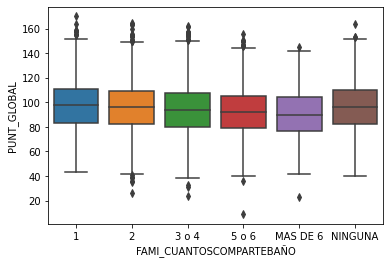

In [14]:
sns.boxplot(x="FAMI_CUANTOSCOMPARTEBAÑO", y="PUNT_GLOBAL", data=df.sort_values(by="FAMI_CUANTOSCOMPARTEBAÑO"))

In [15]:
# colegio no es util
ix_col = set([i for i,v in
        zip(df["ESTU_COLE_TERMINO"].value_counts().index, df["ESTU_COLE_TERMINO"].value_counts().values) if v > 30 ])
df["ESTU_COLE_TERMINO"].apply(lambda x: x if x in ix_col else 'otro').value_counts()[0:6]

otro                                     64140
INST EDUC CEFA                             112
INSTITUTO TECNICO INDUSTRIAL               111
INEM FRANCISCO DE PAULA SANTANDER          107
INST EDUC INEM JOSE FELIX DE RESTREPO       99
COL DIST FERNANDO MAZUERA VILLEGAS          84
Name: ESTU_COLE_TERMINO, dtype: int64

In [16]:
df[["ESTU_VIAJA","PUNT_GLOBAL"]].groupby("ESTU_VIAJA").mean()

,PUNT_GLOBAL
ESTU_VIAJA,
0,90.441535
1,97.788346


### Work with the Model
Entrenar el modelo

In [17]:
feat_num = ["ESTU_EDAD",
            "ESTU_SEMESTRECURSA_NUM",
            'PUNT_GLOBAL',
            'ESTU_VIAJA',
            'ESTU_MCPIO_CITY',
            'ESTU_COLE_TERMINO_TOP']
feat_cat = [
    'ESTU_GENERO',
    'ESTU_DISC_FISICA',
    'ESTU_MCPIO_RESIDE_GR30',
    'ESTU_DEPTO_RESIDE', 
    'ESTU_AREARESIDE',
    'ESTU_ESTADOCIVIL',
    'ESTU_TITULOOBTENIDOBACHILLER',
    'ESTU_PAGOMATRICULABECA',
    'ESTU_PAGOMATRICULACREDITO',
    'ESTU_PAGOMATRICULAPADRES',
    'ESTU_PAGOMATRICULAPROPIO',
    'ESTU_COMOCAPACITOEXAMENSB11',
    'FAMI_EDUCACIONPADRE', #Datos Familia
    'FAMI_EDUCACIONMADRE', 
    'FAMI_TRABAJOLABORPADRE',
    'FAMI_TRABAJOLABORMADRE',
    'FAMI_ESTRATOVIVIENDA',
    'FAMI_TIENEINTERNET',
    'FAMI_TIENESERVICIOTV',
    'FAMI_TIENECOMPUTADOR',
    'FAMI_TIENELAVADORA',
    'FAMI_TIENEHORNOMICROOGAS',
    'FAMI_TIENEAUTOMOVIL',
    'FAMI_TIENEMOTOCICLETA',
    'FAMI_TIENECONSOLAVIDEOJUEGOS',
    'FAMI_CUANTOSCOMPARTEBAÑO',
    'ESTU_VALORMATRICULAUNIVERSIDAD',  
    'ESTU_HORASSEMANATRABAJA',
    'ESTU_INST_MUNICIPIO', #Datos Universidad
    'ESTU_INST_DEPARTAMENTO',
    "INST_NOMBRE_INSTITUCION",
    'INST_CARACTER_ACADEMICO',
    'INST_ORIGEN',
    'GRUPOREFERENCIA',
    'ESTU_PRGM_DEPARTAMENTO', #Datos Programa
    'ESTU_NIVEL_PRGM_ACADEMICO',
    'ESTU_METODO_PRGM',
    'ESTU_NUCLEO_PREGRADO',
    'ESTU_PRIVADO_LIBERTAD',
    'ESTU_ESTADOINVESTIGACION'
]

In [18]:
df_x = pd.get_dummies(df[feat_cat],
                      dummy_na=True, drop_first=True)
df_tot = pd.concat((df_x, df[feat_num]), axis=1)

In [19]:
df_tot.shape

(68725, 702)

In [20]:
#df_tot.corr()

In [21]:
features = list(set(df_tot.columns) - set(["PUNT_GLOBAL"]))
X = df_tot[features].fillna(0)
y = df_tot[["PUNT_GLOBAL"]]

In [22]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

<AxesSubplot:>

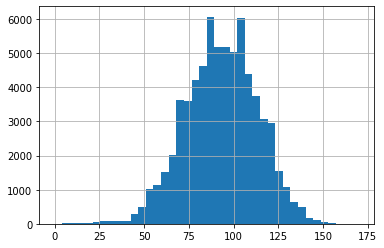

In [23]:
df["PUNT_GLOBAL"].hist(bins=40)

In [24]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train).fit()
model.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.204
No. Observations:               54980   F-statistic:                     24.64
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
===============================================================================================================================================================================================
                                                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                                          70.1734      8.667      8.097      0.000      53.186      87.161
ESTU_INST_DEPARTAMENTO_ATLANTICO                                                                                                4.4665      0.939      4.756      0.000       2.626       6.307
ESTU_MCPIO_RESIDE_GR30_CARTAGO                                                                                                 -2.8343      3.948     -0.718      0.473     -10.572       4.904
ESTU_PRGM_DEPARTAMENTO_ATLANTICO                                                                                               -3.1340      8.632     -0.363      0.717     -20.052      13.784
ESTU_PRGM_DEPARTAMENTO_BOYACA                                                                                                  -3.7685      8.661     -0.435      0.663     -20.744      13.207
ESTU_INST_DEPARTAMENTO_SUCRE                                                                                                    8.0168      2.742      2.923      0.003       2.642      13.392
ESTU_MCPIO_RESIDE_GR30_MARINILLA                                                                                                6.4472      3.862      1.669      0.095      -1.123      14.017
ESTU_MCPIO_RESIDE_GR30_SOACHA                                                                                                   4.2789      3.496      1.224      0.221      -2.572      11.130
ESTU_PRGM_DEPARTAMENTO_CASANARE                                                                                                -3.1312      8.880     -0.353      0.724     -20.535      14.273
FAMI_TRABAJOLABORPADRE_Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial                            -4.3927      1.069     -4.108      0.000      -6.488      -2.297
ESTU_DEPTO_RESIDE_NARIÑO                                                                                                        3.6011      7.766      0.464      0.643     -11.620      18.822
FAMI_TRABAJOLABORPADRE_Trabaja en el hogar, no trabaja o estudia                                                               -0.0851      0.437     -0.195      0.845      -0.941       0.771
INST_NOMBRE_INSTITUCION_CORPORACION TECNOLOGICA INDOAMERICA-BARRANQUILLA                                                        3.9221      6.773      0.579      0.563      -9.352      17.196
ESTU_MCPIO_CITY                                                                                                             -7.493e-14   1.55e-13     -0.483      0.629   -3.79e-13    2.29e-13
ESTU_ESTADOCIVIL_Unión libre                                                                                                   -2.6225      0.385     -6.817      0.000      -3.377      -1.868
ESTU_MCPIO_RESIDE_GR30

In [25]:
df_rsl = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]
df_rsl = df_rsl.rename_axis('Variable').reset_index()
df_rsl["P>|t|"] = list(model.pvalues)
df_rsl.sort_values(by="P>|t|")

,Variable,coef,std err,t,P>|t|,[0.025,0.975]
377,ESTU_AREARESIDE_Cabecera Municipal,3.721500e+00,2.360000e-01,15.777,5.981465e-56,3.259000e+00,4.184000e+00
260,ESTU_HORASSEMANATRABAJA_Menos de 10 horas,-3.437000e+00,2.720000e-01,-12.622,1.800383e-36,-3.971000e+00,-2.903000e+00
328,FAMI_EDUCACIONPADRE_nan,-1.852820e+01,1.625000e+00,-11.400,4.520045e-30,-2.171400e+01,-1.534300e+01
289,FAMI_ESTRATOVIVIENDA_Estrato 3,2.895900e+00,2.670000e-01,10.861,1.879329e-27,2.373000e+00,3.418000e+00
88,FAMI_EDUCACIONPADRE_Ninguno,-5.997800e+00,6.590000e-01,-9.095,9.811044e-20,-7.290000e+00,-4.705000e+00
98,ESTU_HORASSEMANATRABAJA_Más de 30 horas,2.112100e+00,2.430000e-01,8.702,3.363722e-18,1.636000e+00,2.588000e+00
608,FAMI_EDUCACIONMADRE_Primaria incompleta,-4.173500e+00,4.940000e-01,-8.444,3.140466e-17,-5.142000e+00,-3.205000e+00
348,"INST_NOMBRE_INSTITUCION_UNIVERSIDAD DISTRITAL""...",1.184470e+01,1.429000e+00,8.290,1.162219e-16,9.044000e+00,1.464500e+01
203,ESTU_EDAD,-1.140000e-01,1.400000e-02,-8.254,1.561715e-16,-1.410000e-01,-8.700000e-02
0,const,7.017340e+01,8.667000e+00,8.097,5.768288e-16,5.318600e+01,8.716100e+01


In [26]:
y_hat_train = model.predict(X_train)
y_hat = model.predict(X_test)
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat)

In [27]:
mse_test

325.3177533226606

## Creating GBM
Use gbm instead of lg

In [170]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

In [157]:
for n,o in zip(df[feat_rem_targ].columns,df[feat_rem_targ].dtypes):
    if str(o)=="object":
        df[n] = df[n].astype("category")

In [166]:
class ModifiedLabelEncoder(LabelEncoder):

    def fit_transform(self, y, *args, **kwargs):
        return super().fit_transform(y).reshape(-1, 1)

    def transform(self, y, *args, **kwargs):
        return super().transform(y).reshape(-1, 1)


In [196]:
feat_rem_targ = list(set(feat_cat + feat_num)-set(["PUNT_GLOBAL"]))

one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(sparse=False, handle_unknown="ignore"),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)

hist_mod = HistGradientBoostingRegressor(max_depth=10,random_state=42)
hist_one_hot = make_pipeline(
    one_hot_encoder, hist_mod
)

X_train,X_test, y_train,y_test = train_test_split(df[feat_rem_targ],df[["PUNT_GLOBAL"]],test_size=0.2)

hrg = hist_one_hot.fit(X_train, y_train)
y_hat = hrg.predict(X_test)
mean_squared_error(y_test, y_hat)

/Users/joseramirez/repository/UCO_ML_AI/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


320.22835730622023

In [197]:
hist_one_hot.score(X_test, y_test, sample_weight=None)

0.20583417923437564

/Users/joseramirez/repository/UCO_ML_AI/venv/lib/python3.9/site-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


<AxesSubplot:>

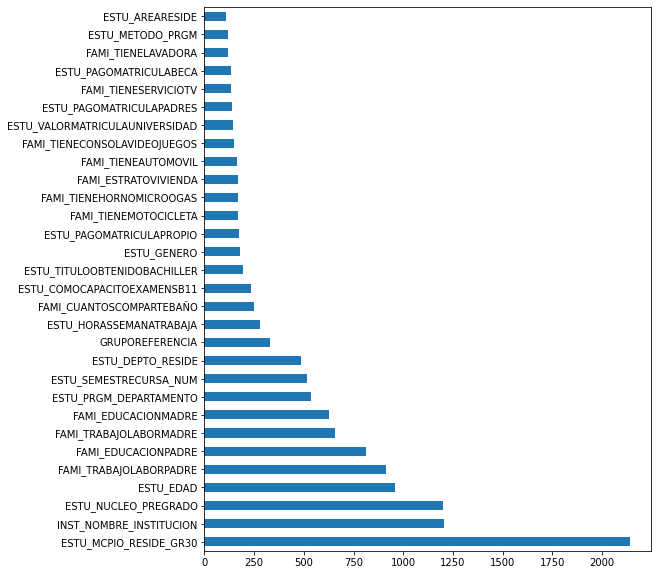

In [198]:
import lightgbm as lgb
#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 1000 define only the absolute maximum
clf = lgb.LGBMRegressor(num_leaves= 15, max_depth=10, 
                         random_state=314, 
                         silent=True, 
                         metric='None', 
                         n_jobs=4, 
                         n_estimators=1000,
                         colsample_bytree=0.7,
                         subsample=0.9,
                         learning_rate=0.1)
clf.fit(X_train, y_train)
feat_imp = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

In [199]:
y_hat = clf.predict(X_test)
mean_squared_error(y_test, y_hat)

327.82405982636453

In [207]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBRegressor
from matplotlib import pyplot
# fit model no training data
xgb = XGBRegressor(tree_method="hist")
hist_one_hot_xg = make_pipeline(
    one_hot_encoder, xgb
)

xgbp = hist_one_hot_xg.fit(X_train, y_train)
y_hat = xgbp.predict(X_test)
mean_squared_error(y_test, y_hat)

325.7325629167899